# Project: Toyota Corolla 중고차 가격 예측

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

## 1. 분석대상 Data 가져오기

In [42]:
test = pd.read_csv("test.csv")
df = pd.read_csv("train.csv")
vr_description = pd.read_excel("data_description.xls")

In [40]:
test # 회귀모델 결정 후 검정을 위한 data

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
1,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
2,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,32,1,2002,61000,Diesel,90,0,White,...,1,1,0,1,0,1,0,0,0,0
3,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,27,6,2002,94612,Diesel,90,1,Grey,...,1,1,0,0,1,1,0,0,0,0
4,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,30,3,2002,75889,Diesel,90,1,Grey,...,1,1,0,0,0,1,0,0,0,0
5,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,27,6,2002,19700,Petrol,192,0,Red,...,1,1,1,0,0,0,1,1,0,0
6,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,23,10,2002,71138,Diesel,69,0,Blue,...,0,1,0,0,0,1,0,0,0,0
7,12,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...,22,11,2002,43610,Petrol,192,0,Red,...,1,1,0,1,1,1,1,0,0,0
8,15,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,32,1,2002,34131,Petrol,192,1,Grey,...,1,1,0,1,1,1,1,0,0,0
9,19,TOYOTA Corolla 1.6 16v L.SOL 2/3-Doors,24,9,2002,25563,Petrol,110,0,Grey,...,1,1,0,1,0,0,0,0,0,0


In [25]:
df # 분석 대상 data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,0,0,0,0,1,0,0,0
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0
5,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,2,2002,23000,Petrol,192,1,...,1,1,0,1,1,1,1,0,0,0
6,16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22000,28,5,2002,18739,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0
7,17,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22750,30,3,2002,34000,Petrol,192,1,...,1,1,0,1,0,1,1,0,0,0
8,18,TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2/...,17950,24,9,2002,21716,Petrol,110,1,...,1,1,1,0,0,0,0,1,0,1
9,20,TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors,16950,30,3,2002,64359,Petrol,110,1,...,1,1,0,0,1,1,0,0,0,0


In [43]:
vr_description # 변수들에 대한 description

,Variable,Description
0,Id,Record_ID
1,Model,Model Description
2,Price,Offer Price in EUROs
3,Age_08_04,Age in months as in August 2004
4,Mfg_Month,Manufacturing month (1-12)
5,Mfg_Year,Manufacturing Year
6,KM,Accumulated Kilometers on odometer
7,Fuel_Type,"Fuel Type (Petrol, Diesel, CNG)"
8,HP,Horse Power
9,Met_Color,"Metallic Color? (Yes=1, No=0)"


## 2. EDA(Exploratory Data Analysis) : due date = ~ 10/10
* 1) Price의 샘플들의 분포 및 대표값 확인(평균, 분산, Max, Min, 중앙값)
* 2) Q-Q plot도 그려서 정규분포에 가까운지 확인해볼 것
* 3) Feature들을 숫자값과 카테고리값으로 나눠 각각의 관계 파악
* 4) 상관계수 분석은 해당 과정 수강 후 진행할 것

> 1) 샘플들의 Price 대표값 확인

In [26]:
p = df['Price']
p.describe()

count     1019.000000
mean     10738.358194
std       3614.987568
min       4350.000000
25%       8400.000000
50%       9850.000000
75%      11950.000000
max      31000.000000
Name: Price, dtype: float64

> 2) 샘플의 Price 분포 확인: 각 샘플들의 Price는 양수인 실수값을 가지므로 대표적인 확률분포 중에서는 카이제곱분포에 가까움. 특히 Q-Q plot으로 나타냈을 때, 정규분포가 아님을 확인할 수 있음

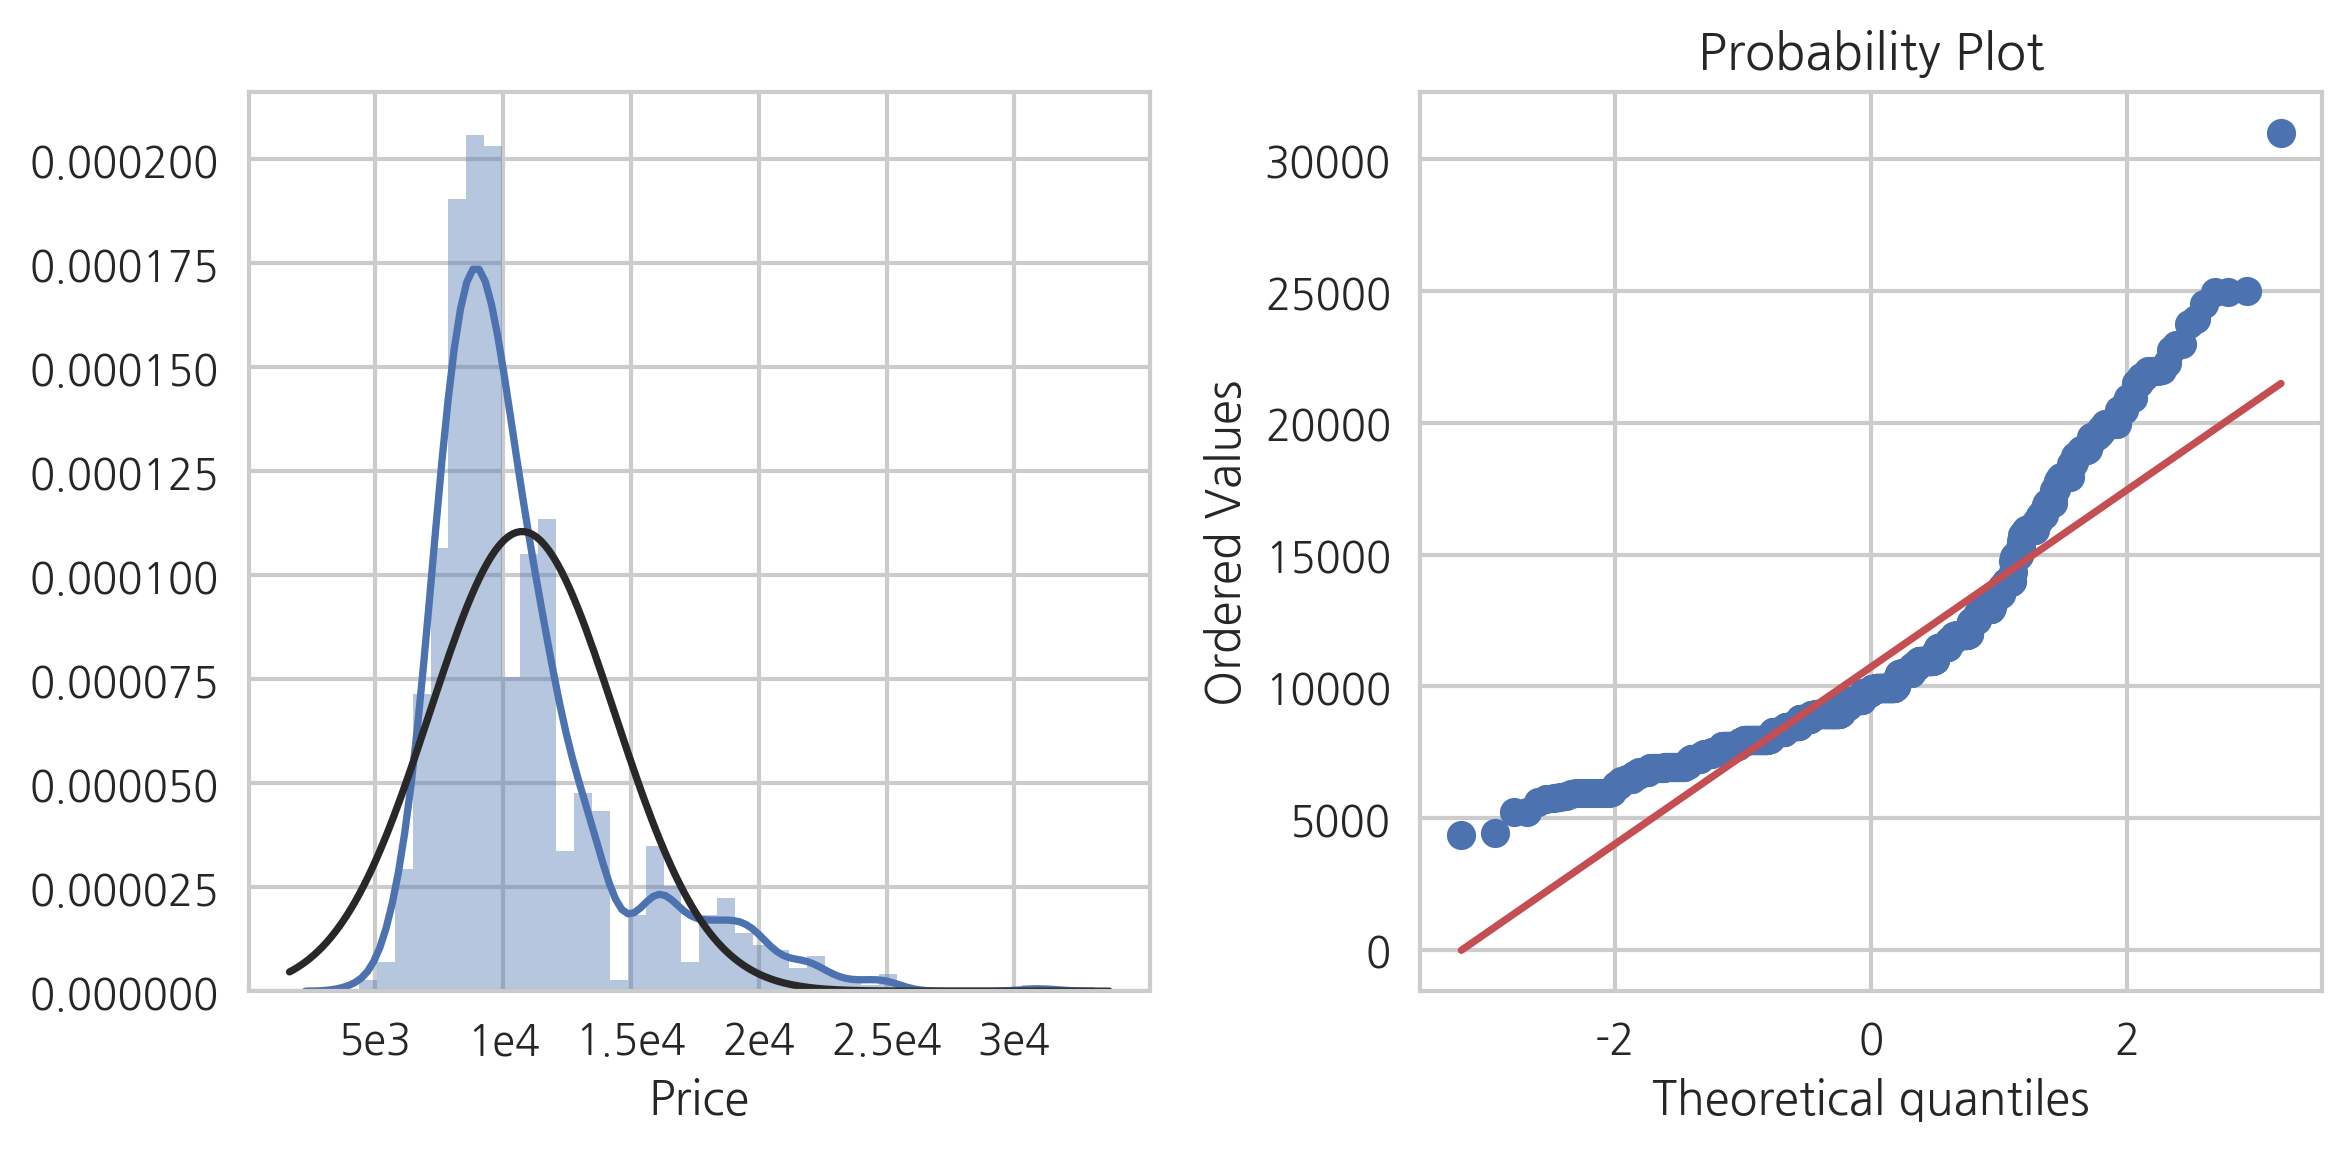

In [90]:
plt.figure(figsize=(8,4))
p_grid = [5e3, 1e4, 1.5e4, 2e4, 2.5e4, 3e4]
p_label = ['5e3', '1e4', '1.5e4', '2e4', '2.5e4', '3e4']
plt.subplot(121); sns.distplot(df.iloc[:,2], fit=sp.stats.norm); plt.xticks(p_grid, p_label)#, bins=30, kde=False)
plt.subplot(122); sp.stats.probplot(df.iloc[:,2], plot=plt)
plt.tight_layout()
plt.show()

> 3) 변수들간의 상관관계 파악

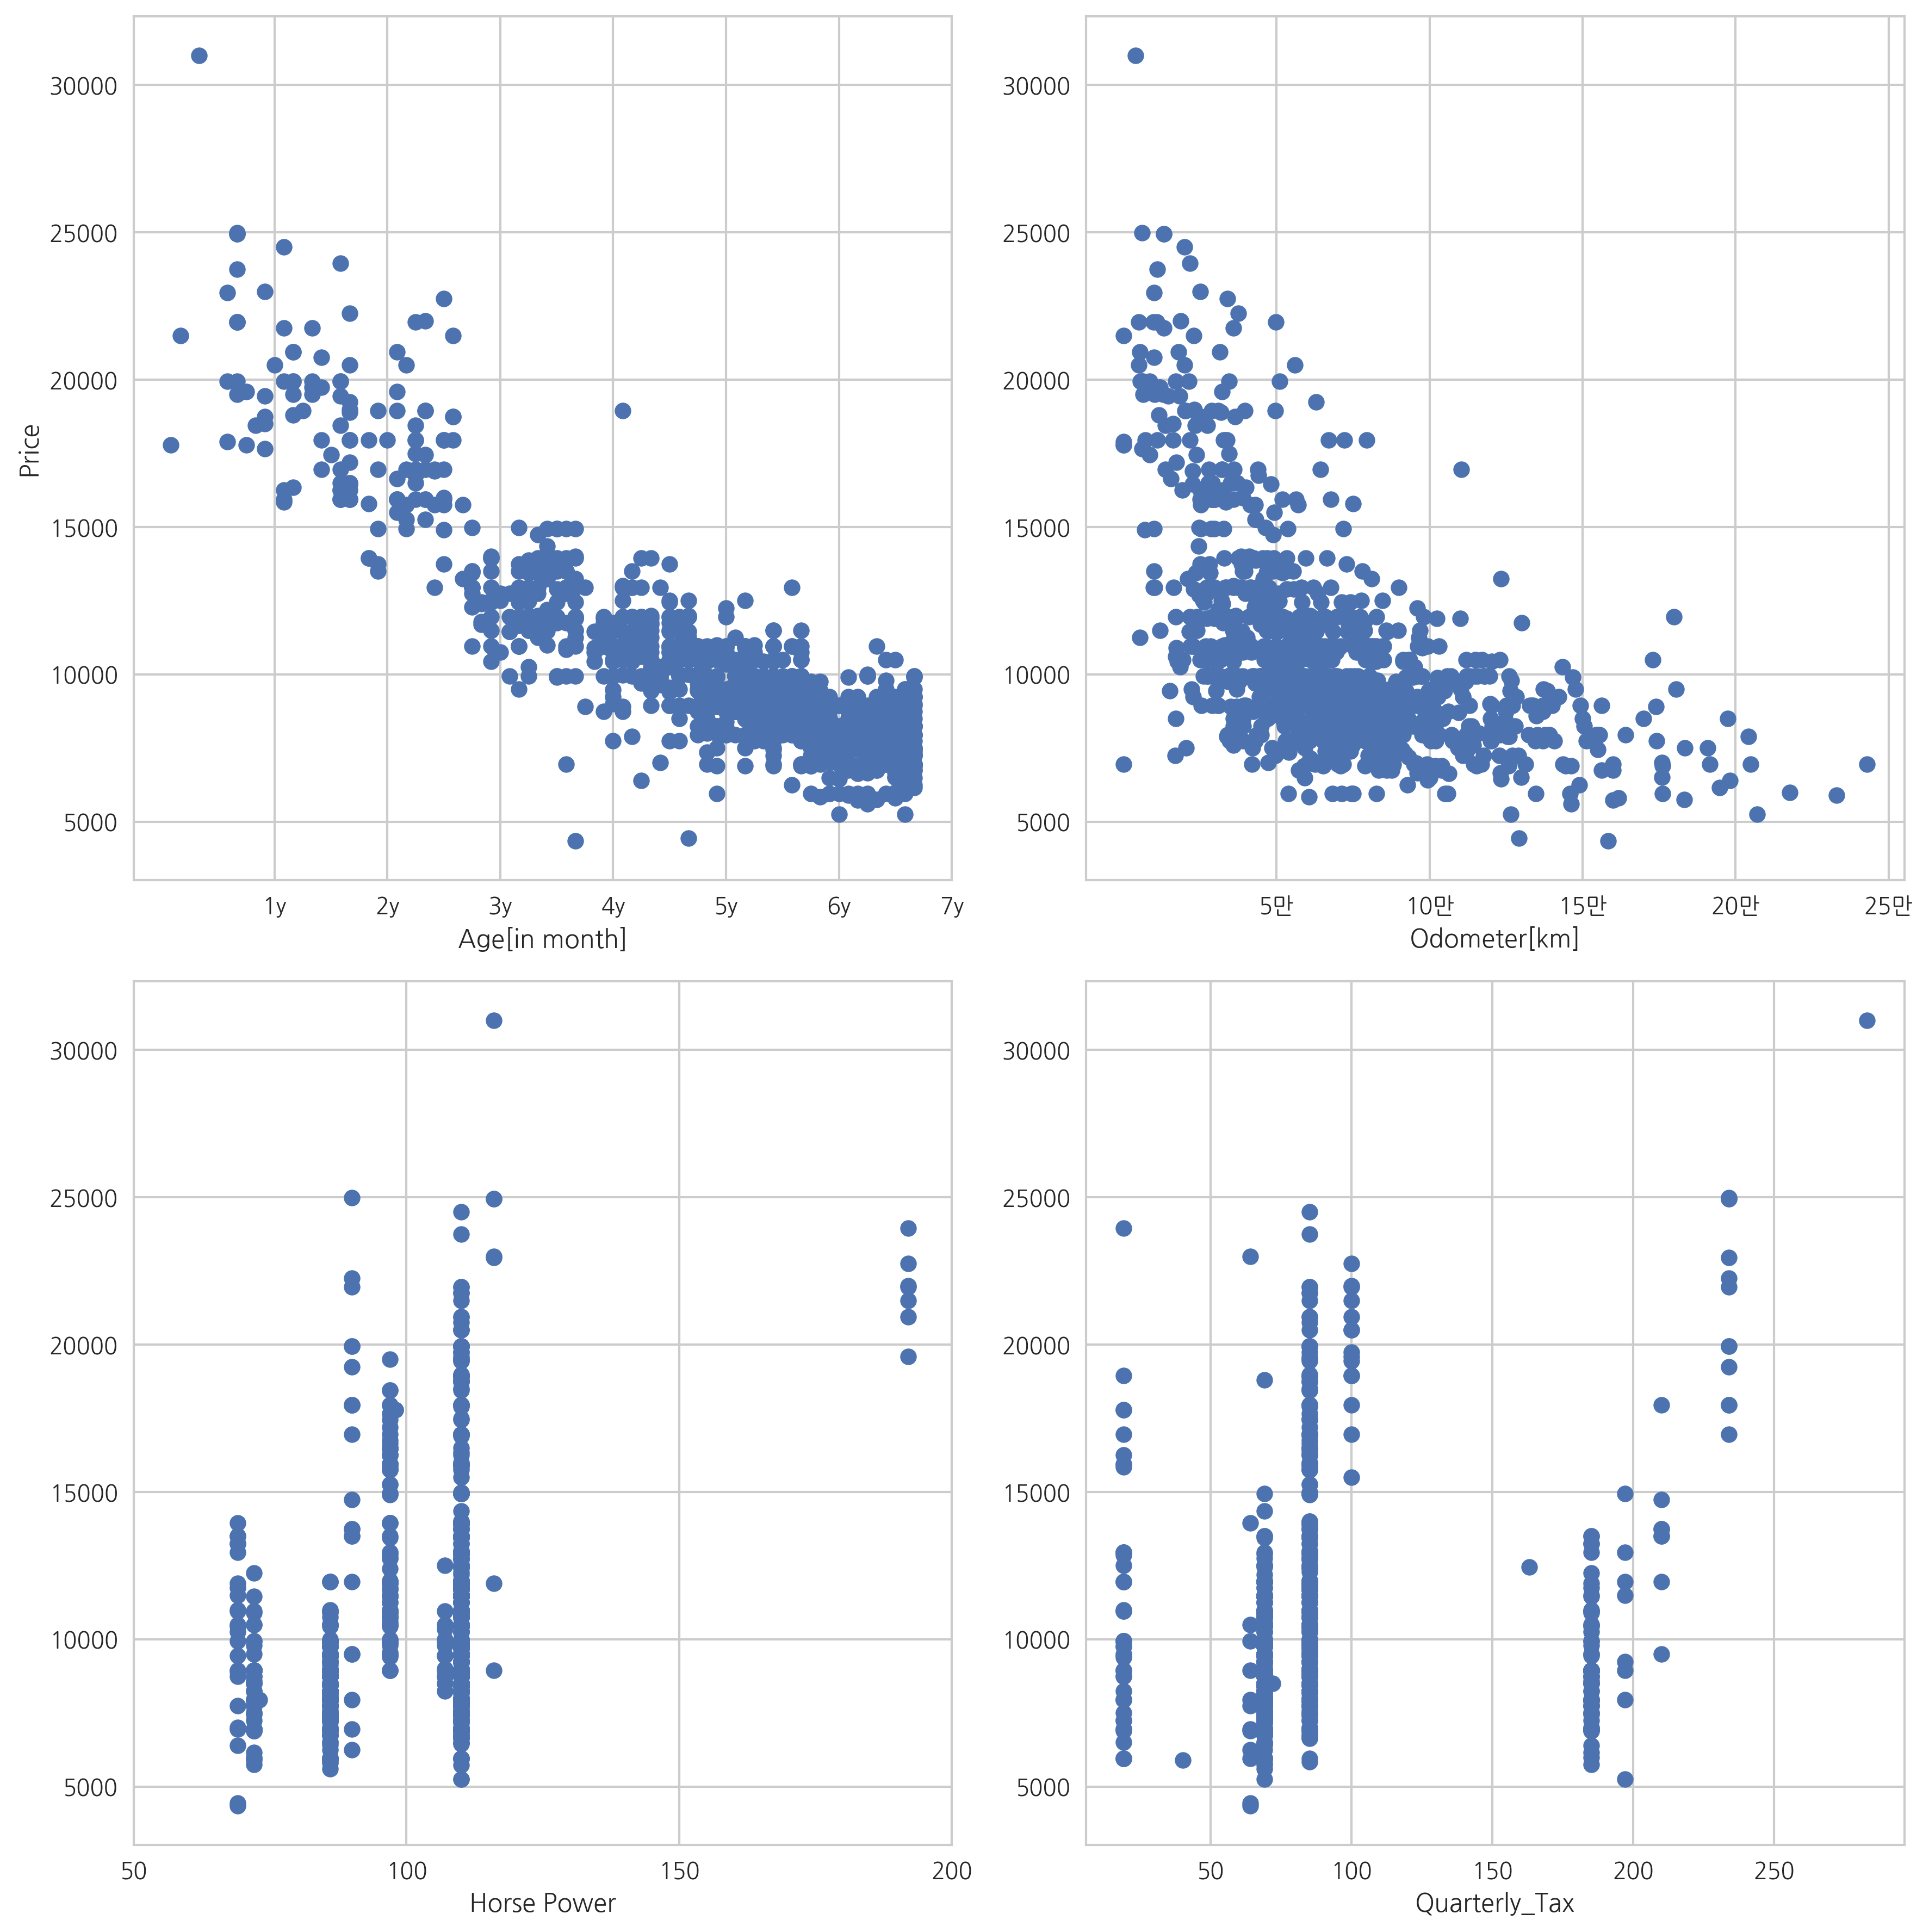

In [156]:
plt.figure(figsize=(12,12))

a_grid = [12, 24, 36, 48, 60, 72, 84]
a_label = ['1y', '2y', '3y', '4y', '5y', '6y', '7y']
plt.subplot(221); plt.scatter(df['Age_08_04'], df['Price']); plt.ylabel('Price'); plt.xlabel('Age[in month]'); \
plt.xticks(a_grid, a_label)

o_grid = [5e4, 1e5, 1.5e5, 2e5, 2.5e5]; o_label = ['5만', '10만', '15만', '20만', '25만']
plt.subplot(222); plt.scatter(df['KM'], df['Price']); plt.xlabel('Odometer[km]'); plt.xticks(o_grid, o_label)

pw_grid = [50, 100, 150, 200]
plt.subplot(223); plt.scatter(df['HP'], df['Price']); plt.xlabel('Horse Power'); plt.xticks(pw_grid)

plt.subplot(224); plt.scatter(df['Quarterly_Tax'], df['Price']); plt.xlabel('Quarterly_Tax'); #plt.xticks(pw_grid)

plt.tight_layout()
plt.show()

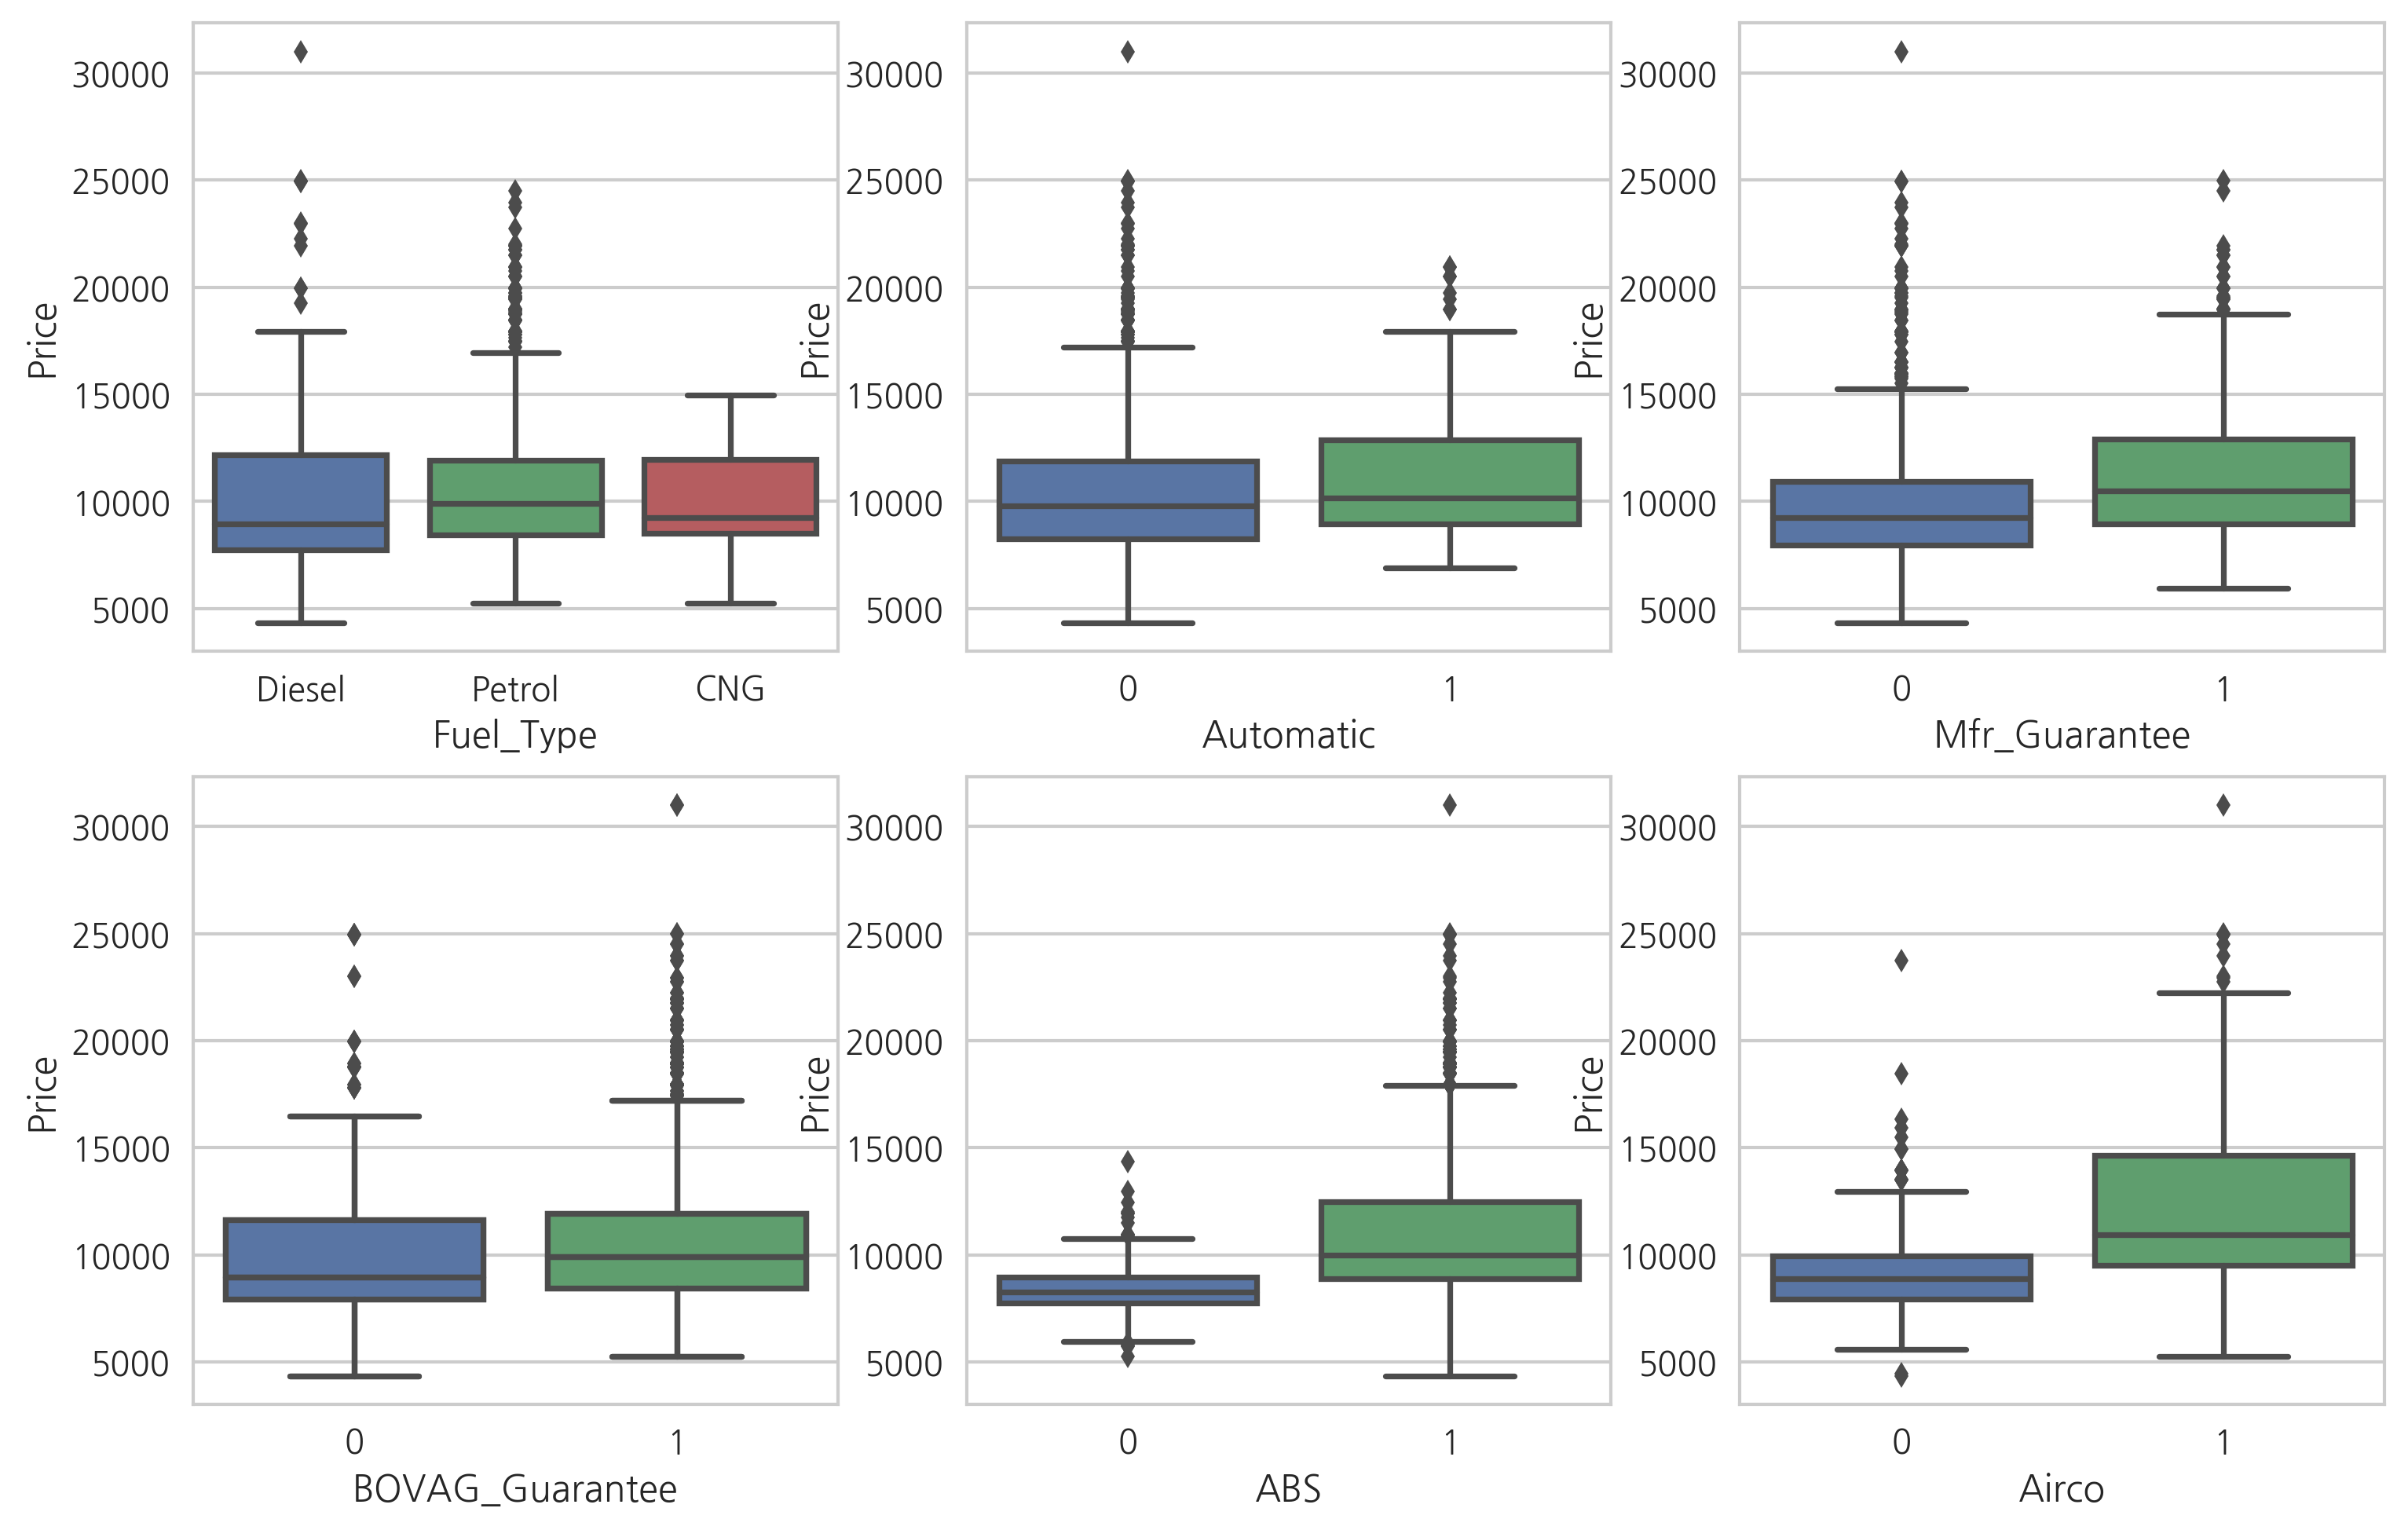

In [154]:
plt.figure(figsize=(12,12))
plt.subplot(331); sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.subplot(332); sns.boxplot(x="Automatic", y="Price", data=df)
plt.subplot(333); sns.boxplot(x="Mfr_Guarantee", y="Price", data=df)
plt.subplot(334); sns.boxplot(x="BOVAG_Guarantee", y="Price", data=df)
plt.subplot(334); sns.boxplot(x="BOVAG_Guarantee", y="Price", data=df)
plt.subplot(335); sns.boxplot(x="ABS", y="Price", data=df)
plt.subplot(336); sns.boxplot(x="Airco", y="Price", data=df)



In [133]:
print(df['Model'].value_counts())

TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors           79
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors           57
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors             56
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors            53
TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors           33
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors            29
TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-Doors            28
TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors            26
TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors              25
TOYOTA Corolla 1.6 16V WAGON LINEA TERRA Stationwagen         22
TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-Doors           20
TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors                19
TOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-Doors            18
TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors            17
TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-Doors            15
TOYOTA Corolla 2.0 DSL LI